<a href="https://colab.research.google.com/github/saishrane06/Applied-Plotting-Charting-and-Data-Representation-in-Python/blob/master/Ford_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download adhurimquku/ford-car-price-prediction

ford-car-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip ford-car-price-prediction.zip

Archive:  ford-car-price-prediction.zip
replace ford.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ford.csv                


In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
ford_df = pd.read_csv("ford.csv")
ford_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
ford_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
ford_df.isnull().value_counts()

model  year   price  transmission  mileage  fuelType  tax    mpg    engineSize
False  False  False  False         False    False     False  False  False         17966
dtype: int64

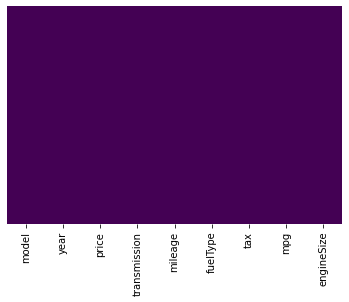

In [7]:
sns.heatmap(ford_df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

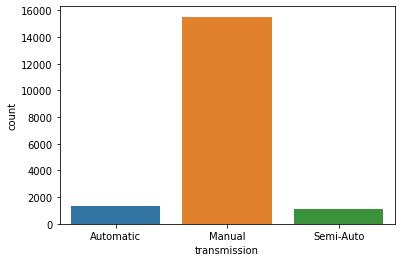

In [8]:
sns.countplot(x="transmission",data=ford_df)

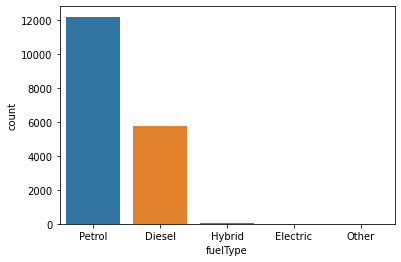

In [9]:
sns.countplot(x="fuelType",data=ford_df)

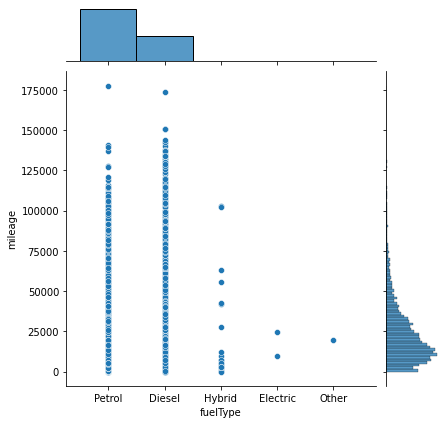

In [10]:
sns.jointplot(x="fuelType",y="mileage",data=ford_df)

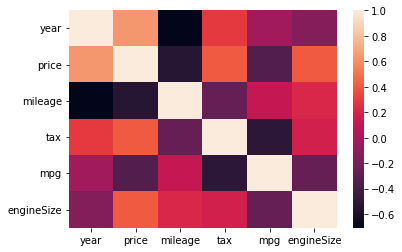

In [11]:
sns.heatmap(data=ford_df.corr())

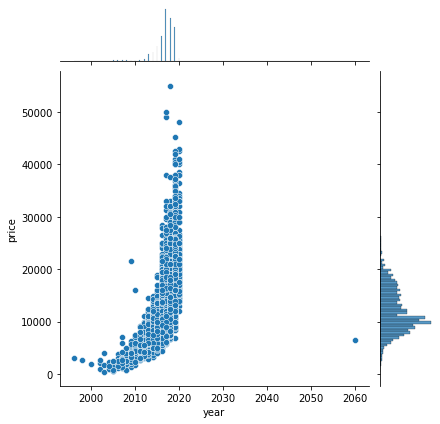

In [12]:
sns.jointplot(x="year",y="price",data=ford_df)

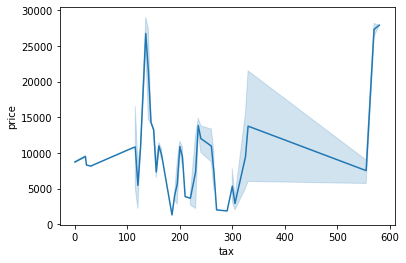

In [13]:
sns.lineplot(x="tax",y="price",data=ford_df)

In [14]:
from sklearn import preprocessing
Transmission_temp = preprocessing.LabelEncoder()
Transmission_temp.fit(ford_df["transmission"])
Transmission_temp.classes_
Transmission=Transmission_temp.transform(ford_df["transmission"])


fueltype_temp =  preprocessing.LabelEncoder()
fueltype_temp.fit(ford_df["fuelType"])
fueltype_temp.classes_
fueltype=fueltype_temp.transform(ford_df["fuelType"])

In [15]:
ford_df.drop(["model","transmission","fuelType"],axis=1,inplace=True)

In [16]:
Transmission=pd.Series(Transmission)
fueltype=pd.Series(fueltype)

ford_df=pd.concat([ford_df,Transmission,fueltype],axis=1)
ford_df.rename(columns={"0":""})
ford_df.head()

,year,price,mileage,tax,mpg,engineSize,0,1
0,2017,12000,15944,150,57.7,1.0,0,4
1,2018,14000,9083,150,57.7,1.0,1,4
2,2017,13000,12456,150,57.7,1.0,1,4
3,2019,17500,10460,145,40.3,1.5,1,4
4,2019,16500,1482,145,48.7,1.0,0,4


In [17]:
ford_df.rename(columns={0:'Transmission',1:'fueltype'},inplace=True)
ford_df.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'Transmission',
       'fueltype'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=ford_df.drop("price",axis=1)
y=ford_df['price']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)